In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

# Read data

In [2]:
data = pd.read_csv('corn.csv')

## Columns (fields)

In [3]:
data.columns

Index(['year', 'month', 'open', 'close', 'open_net', 'close_net', 'open_rel',
       'close_rel', 'volume', 'openint', 'day', 'date'],
      dtype='object')

## Contract information

In [4]:
_m = data['month'].unique()
_y = data['year'].drop_duplicates().sort_values()
print("{} years from {} to {}".format(len(_y), _y.iloc[0], _y.iloc[-1]))
print("months: {}".format(_m))
_nmonths = len(_m)
_nyears = len(_y)
_contracts = data[['year', 'month']].drop_duplicates()
_ncontracts = len(_contracts)
_npossible = _nmonths * _nyears
print('Num of contracts {} {} possible {}'.format(_ncontracts, '=' if _ncontracts == _npossible else '<', _npossible ))

44 years from 1959 to 2002
months: [12  5  3  7  9 10]
Num of contracts 217 < possible 264


# Support code

In [5]:
# plots important data for a single contract (year & month)
def contractPlots(df, year, month):
    print("Contract plots for {}/{}".format(year, month))
    row = df[(df['year'] == year) & (df['month'] == month)]

    plt.rcParams["figure.figsize"]=20,15
    plt.subplot(4, 1, 1)
    plt.plot(row['day'], row['close_net'], 'r-', label="close")
    plt.plot(row['day'], row['open_net'], 'b-', label='open')
    plt.grid(b=True, which='major')
    plt.ylabel('Net')
    plt.title('Price')
    plt.legend()
    
    plt.subplot(4, 1, 2)
    plt.plot(row['day'], row['close_rel'], 'r-', label="close")
    plt.plot(row['day'], row['open_rel'], 'b-', label='open')
    plt.grid(b=True, which='major')
    plt.ylabel('Relative')
    plt.title('Price')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(row['day'], row['volume'], 'b-')
    plt.grid(b=True, which='major')
    plt.ylabel('Contracts')
    plt.title('Volume')

    plt.subplot(4, 1, 4)
    plt.plot(row['day'], row['openint'], 'b-')
    plt.grid(b=True, which='major')
    plt.ylabel('Contracts')
    plt.title('Open Interest')
    plt.show()
    
def yearPlots(df, year):
    yeardata = df[df['year'] == year]
    months = yeardata['month'].unique()
    for month in months:
        contractPlots(data, 1999, month)

In [6]:
def allYears(col, month):
    _df = data[data['month'] == month]
    years = pd.unique(_df['year'])
    for year in years:
        _df2 = _df[_df['year']==year]
        plt.plot(_df2['day'], _df2[col])

In [7]:
def overallStats(dfin, month, days=200):
    meanlist = []
    rellist = []
    varlist = []
    vollist = []
    openintlist = []
    days = range(days)

    df = dfin[dfin['month']==month]
    for i in days:
        meanlist.append(df[df['day']==i]['close_net'].mean())
        rellist.append(df[df['day']==i]['close_rel'].mean())
        varlist.append(df[df['day']==i]['close_net'].var())
        vollist.append(df[df['day']==i]['volume'].mean())
        openintlist.append(df[df['day']==i]['openint'].mean())

    #plt.rcParams["figure.figsize"]=20,25

    plt.subplot(5, 1, 1)
    plt.plot(days, meanlist, 'g-')
    plt.grid(b=True, which='major')
    plt.title('Close - Mean')
    plt.ylabel('Net')

    plt.subplot(5, 1, 2)
    plt.plot(days, varlist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Net Close - Var')
    plt.ylabel('Variance')

    plt.subplot(5, 1, 3)
    plt.plot(days, rellist, 'g-')
    plt.grid(b=True, which='major')
    plt.title('Relative Close - Mean')
    plt.ylabel('Relative')

    plt.subplot(5, 1, 4)
    plt.plot(days, vollist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Volume')
    plt.ylabel('Contracts')

    plt.subplot(5, 1, 5)
    plt.plot(days, openintlist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Openint')
    plt.ylabel('Contracts')

## Contract plots one contract

Contract plots for 1999/12


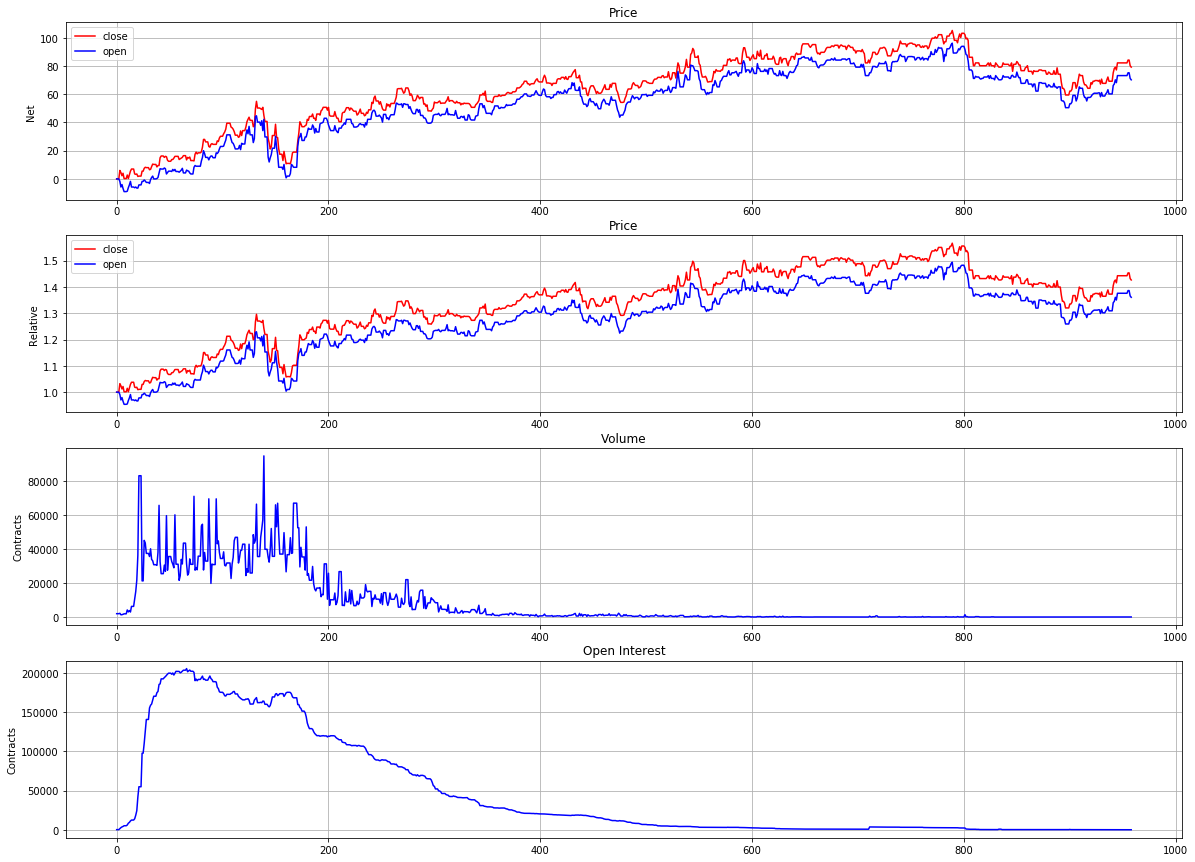

In [8]:
year = 1999
month = 12
contractPlots(data, year, month)

# Contract plots for a year

Contract plots for 1999/3


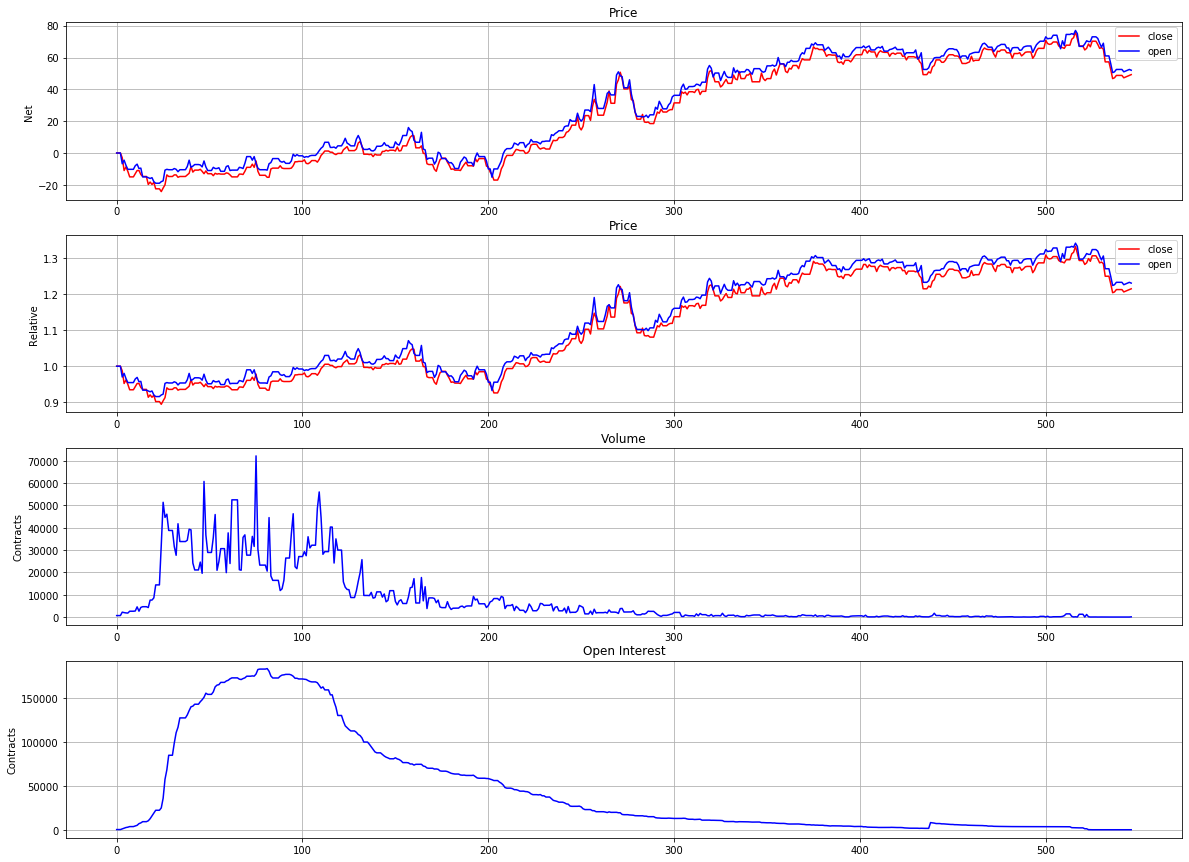

Contract plots for 1999/12


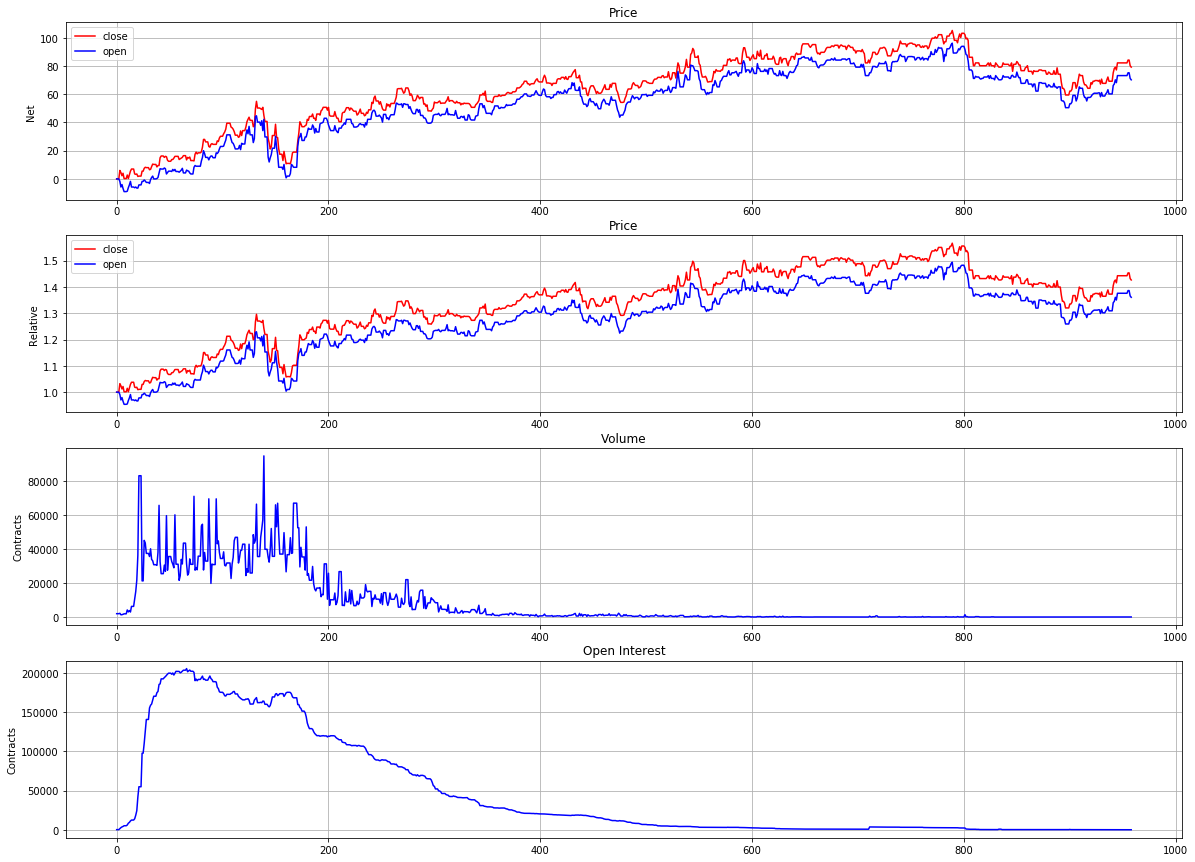

Contract plots for 1999/9


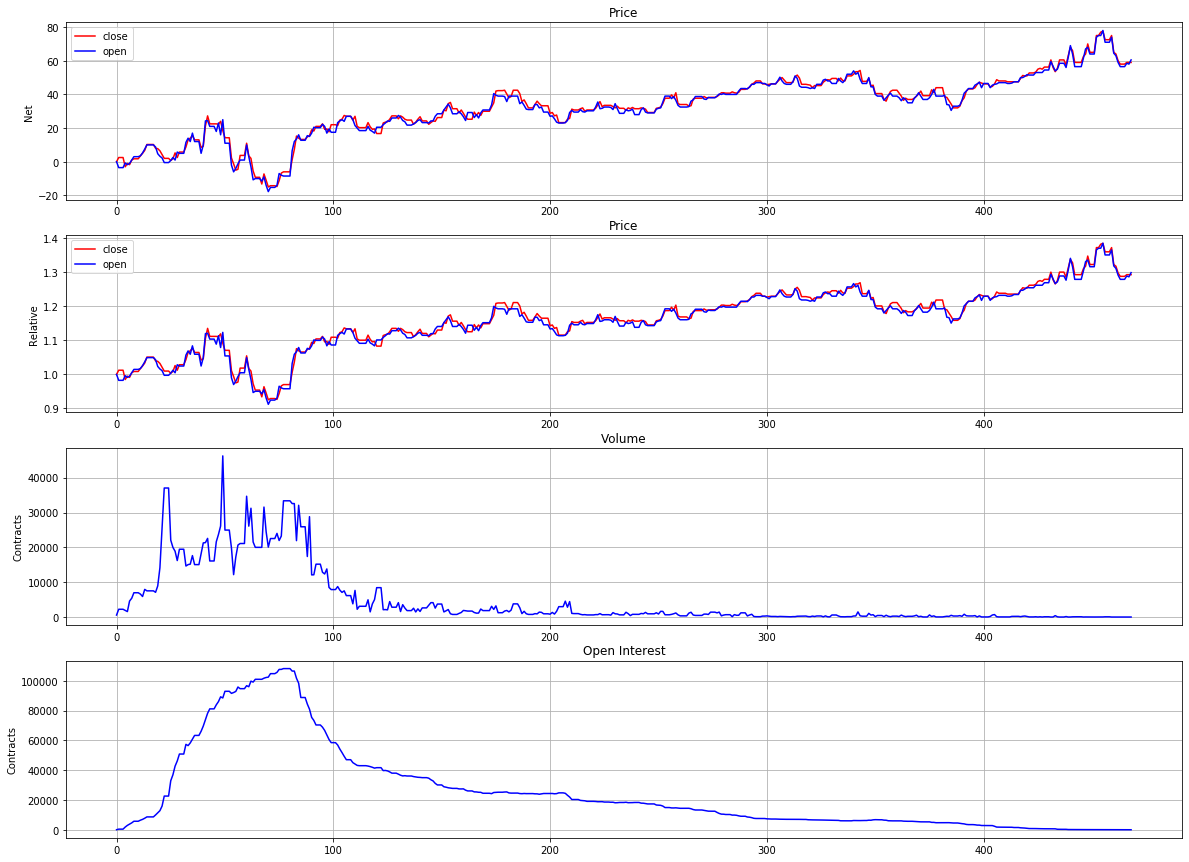

Contract plots for 1999/7


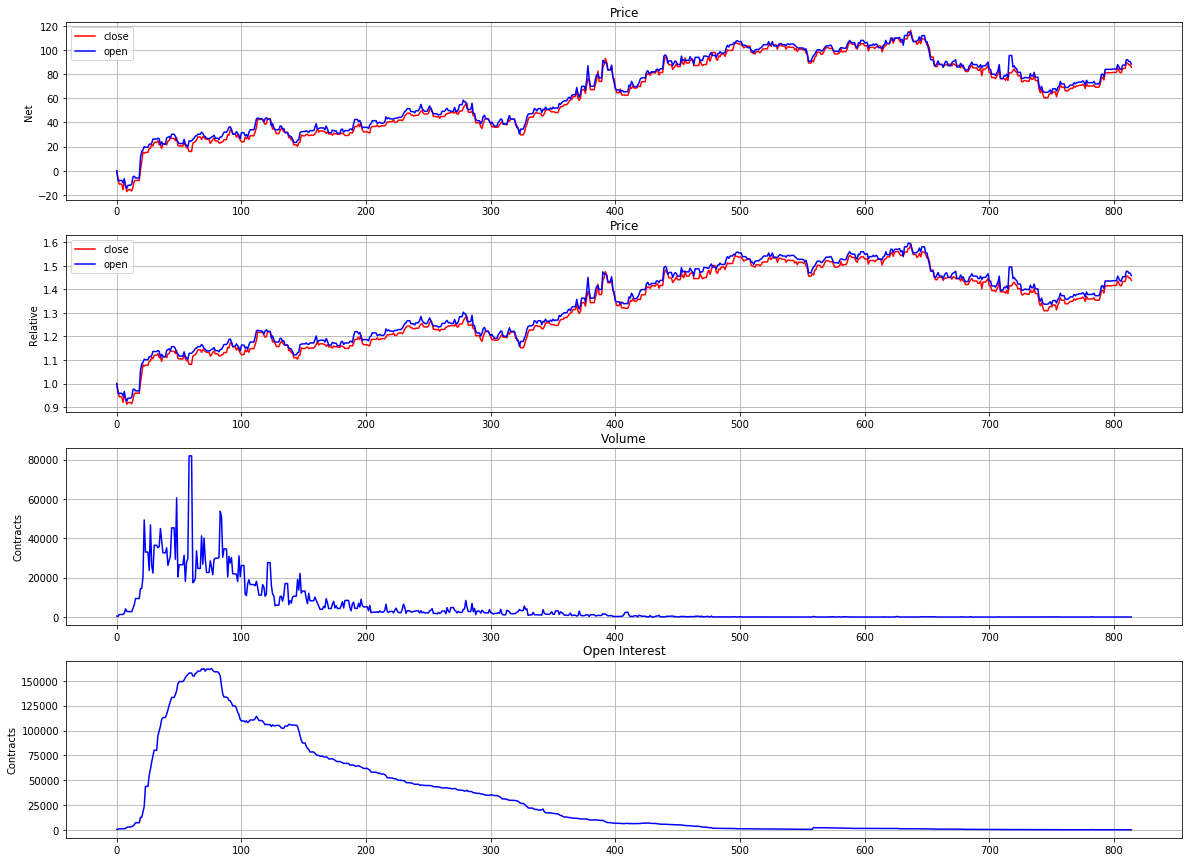

Contract plots for 1999/5


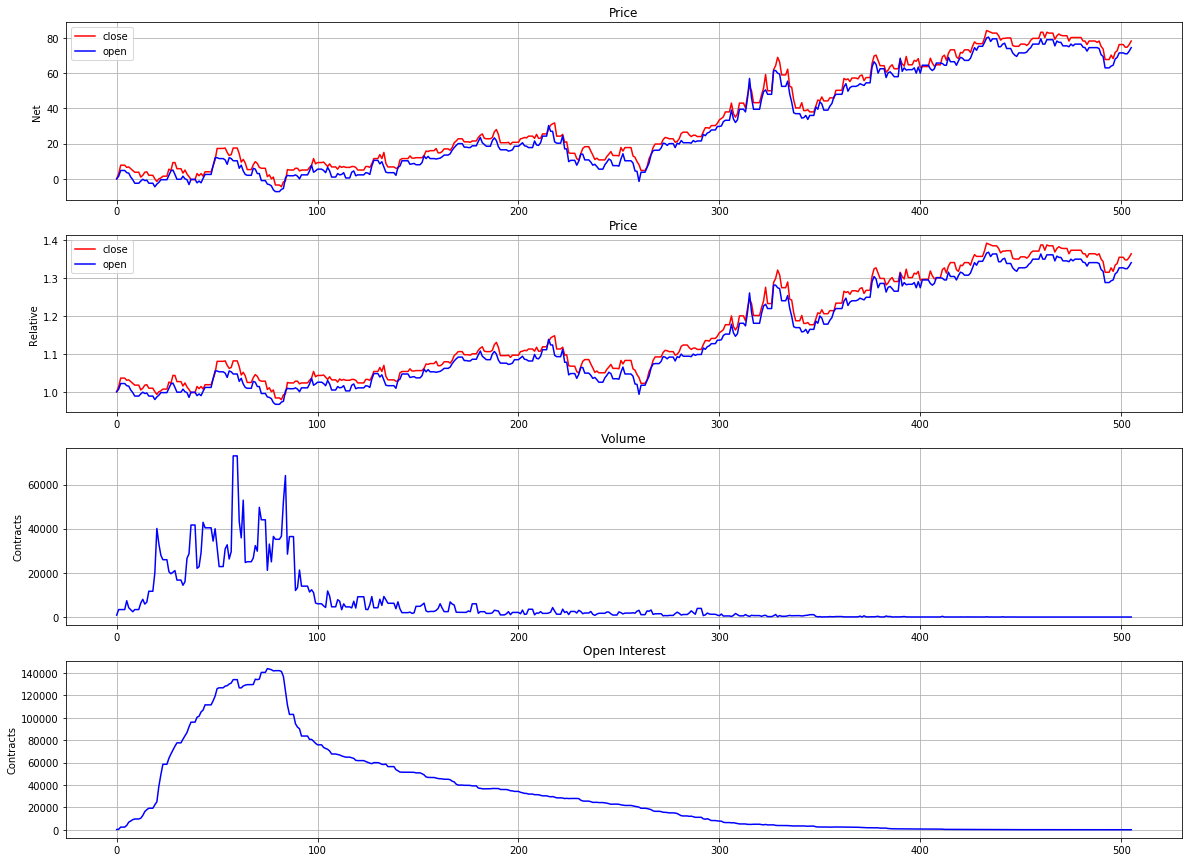

In [9]:
yearPlots(data, 1999)

## All years: Net close

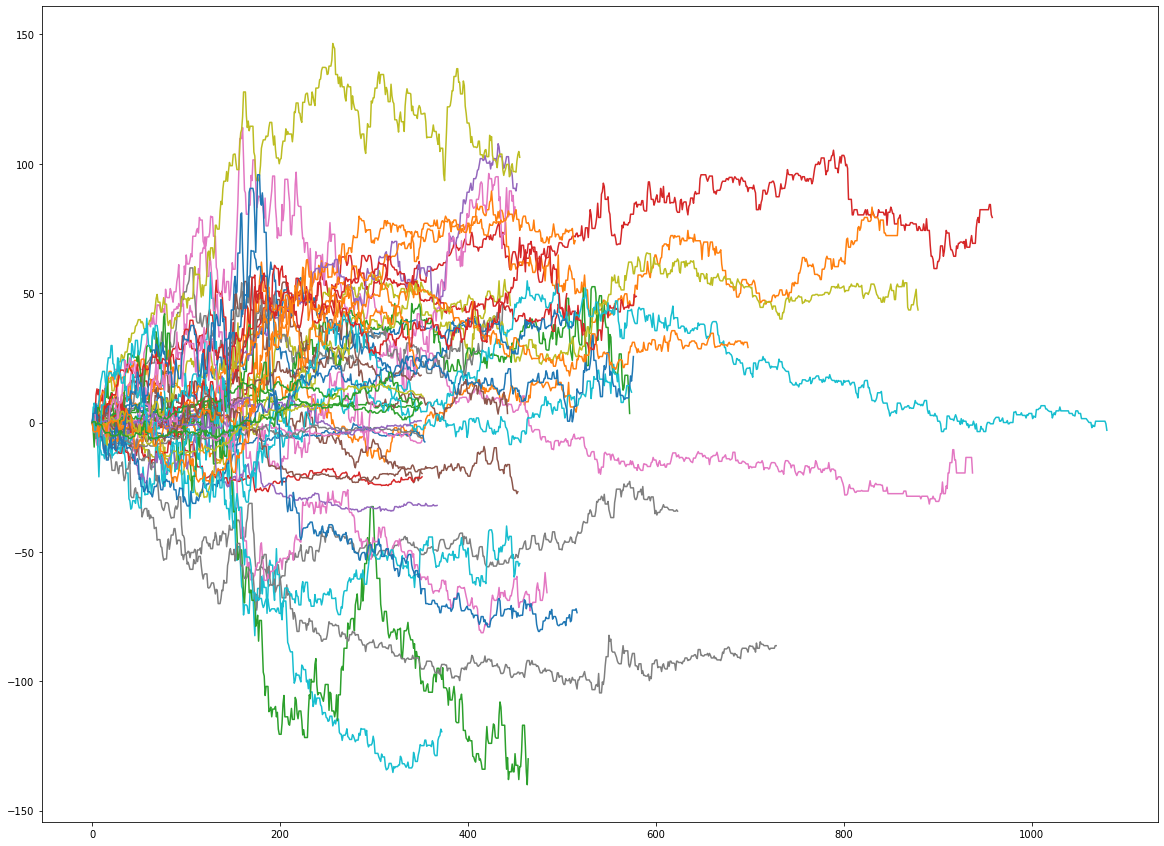

In [10]:
month = 12
allYears('close_net', month)

## All years: Relative close

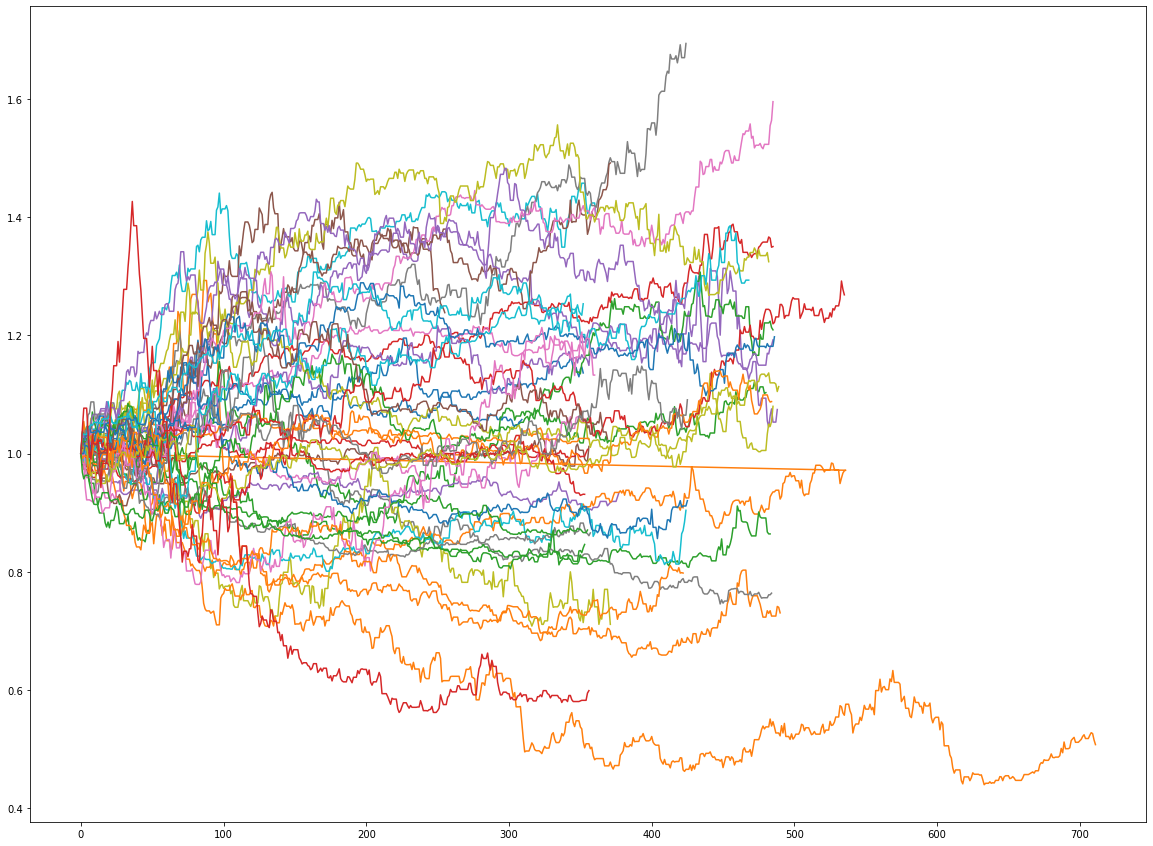

In [11]:
month = 9
allYears('close_rel', month)

# Overall statistics
The plots below show the aggregate (mean or variance) of all years by day. For example, at 200 on the x-axis, we see the average of all net close prices 200 days before the contract end.

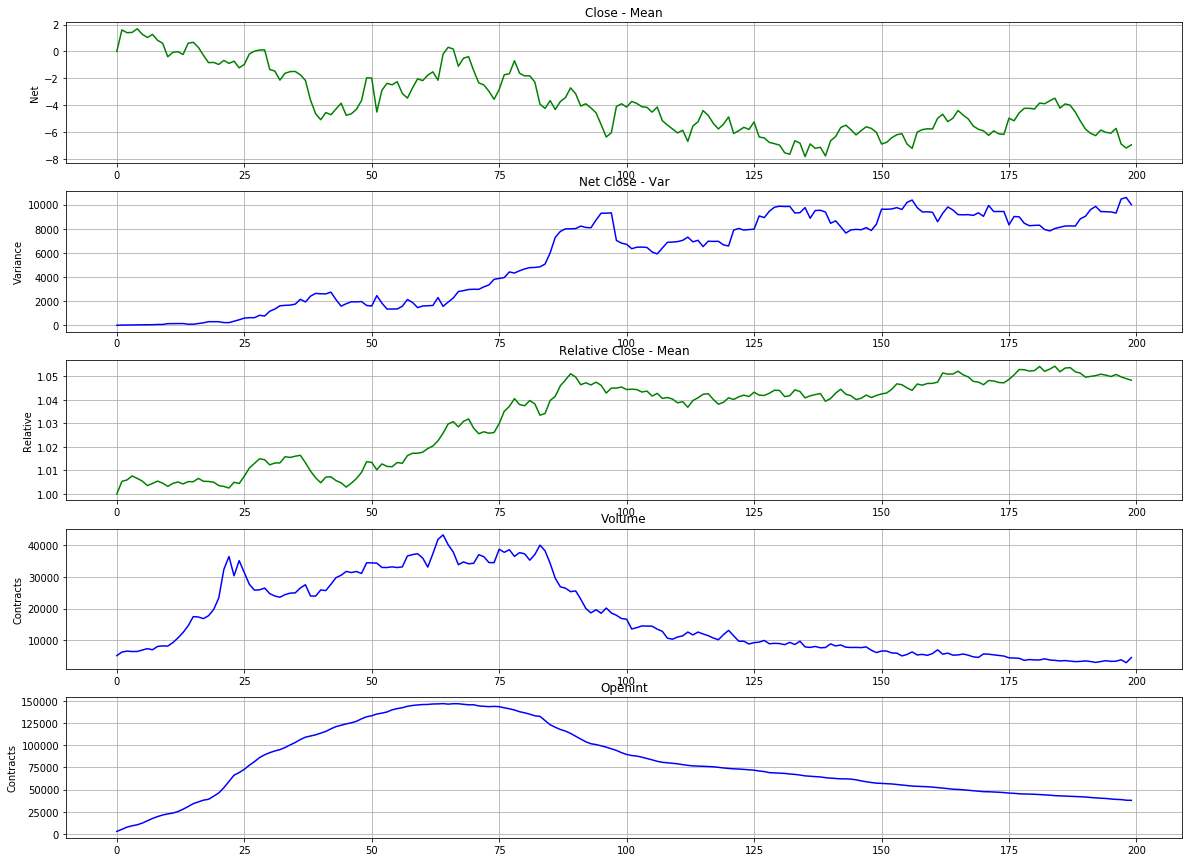

In [12]:
overallStats(data, 9)